In [37]:
#Importação de módulos
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

In [38]:
#Leitura da base de dados
base = pd.read_csv('house_prices.csv')
X = base.iloc[:, 3:19].values
y = base.iloc[:, 2:3].values

In [39]:
base

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [40]:
#Atributos previsores iniciando em bedrooms
X[0]

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  9.81780e+04,  4.75112e+01, -1.22257e+02])

In [41]:
#Variável alvo (price)
y[0]

array([221900.])

In [42]:
#Escalonamento de variáveis
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [43]:
#Divisão de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y.ravel(),
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [44]:
#Montagem da rede e treinamento
regressor = MLPRegressor(
                        hidden_layer_sizes = (9,9),
                        max_iter = 500
                        )
regressor.fit(X_treinamento, y_treinamento)

MLPRegressor(hidden_layer_sizes=(9, 9), max_iter=500)

In [45]:
#Análise do score da base de treinamento
regressor.score(X_treinamento, y_treinamento)


0.8937842746902666

In [46]:
#Análise do score da base de teste
regressor.score(X_teste, y_teste)



0.8812119367032284

In [47]:
#Erro Médio Absoluto
previsoes = regressor.predict(X_teste)
y_teste = scaler_y.inverse_transform(y_teste)
previsoes = scaler_y.inverse_transform(previsoes)
mae = mean_absolute_error(y_teste, previsoes)
mae

75942.3565503054

### Utilizando o TensorFLow

In [48]:
# Bibliotecas do Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [49]:
#Definição do modelo
model = Sequential([
        keras.layers.Input(shape=X_treinamento.shape[1:]),  #Definição da camada de entrada, nesse caso são 7 atributos
        keras.layers.Dense(9, activation='relu'),    #Número de neurônios da primeira camada oculta e função de ativação
        keras.layers.Dense(9, activation='relu'),    #Adicionando uma segunda camada oculta
#        keras.layers.Dropout(0.2),  #O dropout ajuda a previnir overfiting, a taxa varia entre 0 a 1 com valores usuais pequenos
        keras.layers.Dense(1, activation='softmax')  #Camada de saída de regressão
    ])

In [50]:
# Dimensão da camada de entrada, retorna o shape do primeiro registro de variáveis de entrada
X_treinamento.shape[1:]

(16,)

In [51]:
#Resumo do modelo criado
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 9)                 153       
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 10        
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [52]:
#Compilando o modelo
from tensorflow.keras import optimizers

model.compile(
#              optimizer='adam',                                 #Adam para o backpropagation
              optimizer=optimizers.RMSprop(learning_rate=0.001), #Otimizador RMSprop com learning rate especificada
#              optimizer=optimizers.SGD(learning_rate=0.001), #Otimizador RMSprop com learning rate especificada
              loss='mse',
              metrics=['mae', 'mse']                               #Métrica utilizada
             )

In [53]:
#Treinamento do modelo
history = model.fit(X_treinamento, y_treinamento, epochs=500, validation_data=(X_teste, y_teste), verbose=1)

Epoch 1/500
473/473 [==============================] - 2s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 2/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 3/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 4/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 5/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 6/500
473/473 [===================

473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 44/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 45/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 46/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 47/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 48/500
473/473 [==========================

473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 86/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 87/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 88/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 89/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 90/500
473/473 [==========================

473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 128/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 129/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 130/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 131/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 132/500
473/473 [=====================

473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 170/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 171/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 172/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 173/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 174/500
473/473 [=====================

473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 212/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 213/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 214/500
473/473 [==============================] - 2s 4ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 215/500
473/473 [==============================] - 2s 4ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 216/500
473/473 [=====================

473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 254/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 255/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 256/500
473/473 [==============================] - 2s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 257/500
473/473 [==============================] - 2s 4ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 258/500
473/473 [=====================

473/473 [==============================] - 2s 4ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 296/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 297/500
473/473 [==============================] - 1s 2ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 298/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 299/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 300/500
473/473 [=====================

473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 338/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 339/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 340/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 341/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 342/500
473/473 [=====================

473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 380/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 381/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 382/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 383/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 384/500
473/473 [=====================

473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 422/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 423/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 424/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 425/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 426/500
473/473 [=====================

473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 464/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 465/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 466/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 467/500
473/473 [==============================] - 1s 3ms/step - loss: 1.9892 - mae: 1.2386 - mse: 1.9892 - val_loss: 427680595968.0000 - val_mae: 538877.2500 - val_mse: 427680595968.0000
Epoch 468/500
473/473 [=====================

In [54]:
#Checando a acurácia
model.evaluate(X_teste, y_teste)

203/203 [==============================] - 0s 2ms/step - loss: 427680595968.0000 - mae: 538877.2500 - mse: 427680595968.0000


[427680595968.0, 538877.25, 427680595968.0]

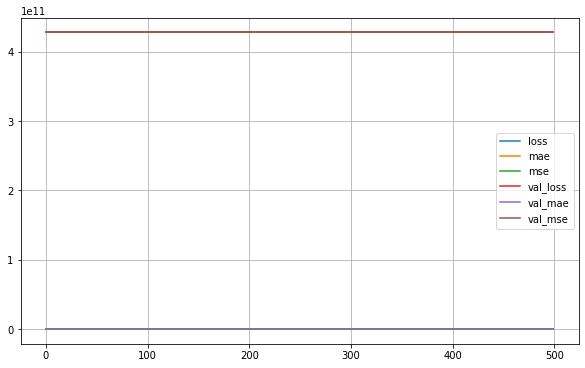

In [56]:
#Visualização gráfica
import matplotlib.pyplot as plt

#Evolução de performance
pd.DataFrame(history.history).plot(figsize=(10,6))  #Evolução das métricas
plt.grid(True)            #Mostra as linhas de grade
#plt.gca().set_ylim(0, 1)  #Limites do eixo y
plt.gca()
plt.show()                #Gera o gráfico